   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0  class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment   
1      p          x            s          n        t     p                f   
2      e          x            s          y        t     a                f   
3      e          b            s          w        t     l                f   
4      p          x            y          w        t     p                f   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0  gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring   
1             c          n           k  ...                         s   
2             c          b           k  ...                         s   
3             c          b           n  ...                         s   
4             c          n           n  ...                         s   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0  stalk-c

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


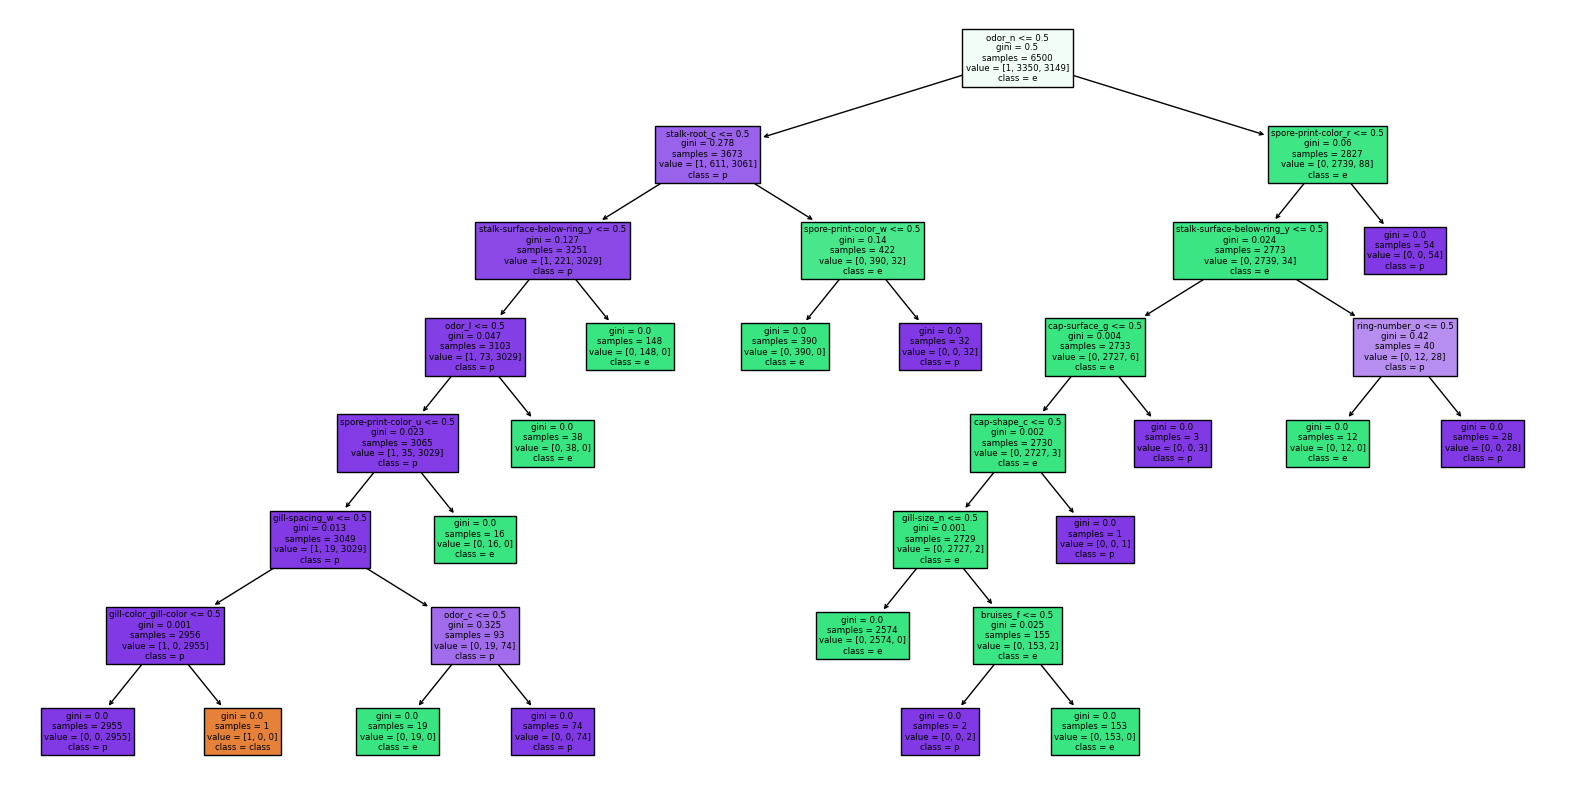

In [ ]:
# Paso 1: Instalar e importar las bibliotecas necesarias
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Paso 2: Cargar el conjunto de datos
url = "/content/drive/MyDrive/UNIVERSITIES/EAFIT University (1)/2024-1/Visión por Computador en la Agricultura - IA0105/s9/mushrooms.csv"
columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment",
           "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
           "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
           "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
mushroom_data = pd.read_csv(url, names=columns)

# Paso 3: Explorar el conjunto de datos
print(mushroom_data.head())

# Paso 4: Convertir características categóricas a valores numéricos usando One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(mushroom_data.drop('class', axis=1))
y = mushroom_data['class']

# Paso 5: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Paso 6: Construir y entrenar un modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Paso 7: Evaluar el modelo
y_pred_train = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy en conjunto de entrenamiento:", train_accuracy)

y_pred_test = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en conjunto de prueba:", test_accuracy)

# Paso 8: Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
feature_names_encoded = encoder.get_feature_names_out(input_features=columns[1:])
class_names = clf.classes_
plot_tree(clf, filled=True, feature_names=feature_names_encoded, class_names=class_names)
plt.show()
